In [38]:
from pcapng import FileScanner
import codecs
import struct
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt
import math

In [13]:
with open('can.pcapng', 'rb') as f:
    scanner = FileScanner(f)
    limit = 100
    blocks = list(scanner)

In [58]:
packets = blocks[2:-1]

In [59]:
packets[-1]

<EnhancedPacket interface_id=0 timestamp_high=366178934 timestamp_low=1898729661 packet_payload_info=(32, 32, b'\x00\x01\x01\x18\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0c\x0e\x03\x00\x00\x08\xff\xff\xff?\xed\xe7\xd2\xbc\x9bT\x9c') options=Options({})>

In [120]:
def parse(packet):
    frame, size = struct.unpack('icxxx', packet.packet_data[16:24])
    frame = hex(frame)
    size = ord(size)
    return (frame, size, packet.packet_data[24:24+size])#, packet.packet_data[21:-8]

parse(packets[0])

('0x30a', 8, b'@K\x92\xb0\xf6k\xa6\xa1')

In [78]:
for i in range(len(packets)):
    if i + 100 >= len(packets):
        break
    if parse(packets[i])[:-1] != parse(packets[i + 100])[:-1]:
        print(parse(packets[i]))
        print(packets[i].packet_data[21:-8])
        print(packets[i + 100].packet_data[21:-8])
        break

In [106]:
set(parse(x)[-1] for x in packets)

{b'\x00\x00\x00',
 b':\x01\x00',
 b'\x8f\xff\xff',
 b'\xb4\xff\xff',
 b'\xff\xff\x7f',
 b'\xff\xff\xff'}

In [2]:
with open('dmp.bin', 'rb') as f:
    packets2 = f.readline().split()

In [382]:
with open('dmp2.bin', 'rb') as f:
    packets3 = f.readline().split()

In [3]:
def parse2(packet):
    return hex(int(packet[1:4], 16)), packet[4] - ord('0'), bytes.fromhex(packet[5:].decode('ascii'))

parse2(packets2[0])

('0x30a', 8, b'@K\x92\xa9\xa0\xd5G\xa6')

In [6]:
for i in range(len(packets2)):
    if i + 103 >= len(packets2):
        break
    if parse2(packets2[i]) != parse2(packets2[i + 103]):
        print(i)
        print(parse2(packets2[i]))
        break

0
('0x30a', 8, b'@K\x92\xa9\xa0\xd5G\xa6')


In [320]:
frames = defaultdict(list)
for p in packets[:100]:
    frames[parse(p)[0]].append(parse(p)[1:])

In [321]:
frames2 = defaultdict(list)
for p in packets2[:103]:
    frames2[parse2(p)[0]].append(parse2(p)[1:])

In [384]:
frames3 = defaultdict(list)
for p in packets3[:103]:
    frames3[parse2(p)[0]].append(parse2(p)[1:])

In [ ]:
for k, v in frames.items():
    print('Frame: {}'.format(k))
    for x in v:
        if (x[0] == 8):
            print(struct.unpack('>d', x[1]))
        print(''.join('{0:4} '.format(y) for y in x[1]))

In [387]:
for k, v in frames2.items():
    print('Frame: {}'.format(k))
    print('dump1')
    for x in frames[k]:
        if (x[0] == 8):
            print(struct.unpack('>d', x[1]))
        print(''.join('{0:4} '.format(y) for y in x[1]))
    print('dump2')
    for x in frames2[k]:
        if (x[0] == 8):
            print(struct.unpack('>d', x[1]))
        print(''.join('{0:4} '.format(y) for y in x[1]))
    print('dump3')
    for x in frames3[k]:
        if (x[0] == 8):
            print(struct.unpack('>d', x[1]))
        print(''.join('{0:4} '.format(y) for y in x[1]))

Frame: 0x30a
dump1
(55.14602546936408,)
  64   75  146  176  246  107  166  161 
dump2
(55.146230374458554,)
  64   75  146  183  173   73  253  156 
dump3
(55.14581939239251,)
  64   75  146  170   53  184  185  102 
Frame: 0x30b
dump1
(37.9390809700113,)
  64   66  248   51  206   35   63   75 
dump2
(37.93762392566996,)
  64   66  248    4   15  144   89  141 
dump3
(37.938369566420306,)
  64   66  248   28  126  115  171   32 
Frame: 0x30c
dump1
(1.1308982701475505,)
  63  242   24   40  200  214   47  239 
dump2
(5.2756969359836035,)
  64   21   26   80   76   46  160  192 
dump3
(5.007654396619869,)
  64   20    7  214  141  220  156  159 
Frame: 0x30d
dump1
(0.0,)
   0    0    0    0    0    0    0    0 
dump2
(0.0,)
   0    0    0    0    0    0    0    0 
dump3
(0.0,)
   0    0    0    0    0    0    0    0 
Frame: 0x30e
dump1
(0.34550010675010223,)
  63  214   28  172  122  208  101  140 
(0.39458749196244275,)
  63  217   64  235  229   88  235   47 
(0.44367487717478327,)
 

In [440]:
frames3['0x123'][0][1]

b'\x00\r\x00#\x00'

In [493]:
def get_doubles(id):
    return [struct.unpack('>d', x[1])[0] for x in frames[id]]

x = np.array(get_doubles('0x30f'))
y = np.array(get_doubles('0x30e'))

In [487]:
list(zip(get_doubles('0x30f'), get_doubles('0x30e')))

[(7.0, 4.222256233222421),
 (8.0, 4.271343618434761),
 (9.0, 4.320431003647101),
 (10.0, 4.369518388859442),
 (12.0, 4.418605774071782),
 (14.0, 4.4676931592841225),
 (17.0, 4.516780544496463),
 (23.0, 4.565867929708803),
 (34.0, 4.6149553149211435),
 (68.0, 4.664042700133484),
 (151.0, 4.713130085345824),
 (151.0, 4.762217470558165),
 (152.0, 4.811304855770505),
 (24.0, 4.860392240982845),
 (16.0, 4.909479626195186),
 (12.0, 4.958567011407526),
 (10.0, 5.007654396619866),
 (8.0, 5.056741781832207),
 (7.0, 5.105829167044547),
 (6.0, 5.154916552256887),
 (6.0, 5.204003937469228),
 (5.0, 5.253091322681568),
 (5.0, 5.302178707893908),
 (4.0, 5.351266093106249),
 (4.0, 5.400353478318589),
 (4.0, 5.4494408635309295),
 (4.0, 5.49852824874327),
 (4.0, 5.54761563395561),
 (3.0, 5.5967030191679505),
 (3.0, 5.645790404380291),
 (3.0, 5.694877789592631),
 (3.0, 5.743965174804972),
 (3.0, 5.793052560017312)]

In [437]:
np.mean(x)

23.939393939393938

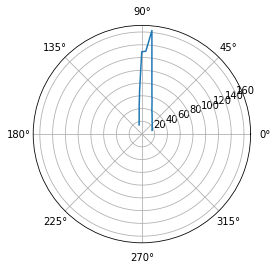

In [494]:
plt.polar(y, x)

In [439]:
y[1]-y[0]

0.04908738521234035

In [379]:
(x * (y[1]-y[0])).sum()

14.480778637640404

In [496]:
struct.unpack('>d', b'\x3F\xF0\x00\x00\x00\x00\x00\x00')[0]

1.0

In [467]:
list(map(hex, struct.pack('>d', 0.5)))

['0x3f', '0xe0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0']

In [829]:
with open('build-remote_control-Desktop_Qt_5_12_5_GCC_64bit-Debug/dmp.txt', 'rb') as f:
    packets = f.readline().split()

In [827]:
lats = []
lons = []
angs = []
speeds = []

for i in range(len(packets)):
    try:
        pp = parse2(packets[i])
        if pp[0] == '0x30a':
            lats.append(struct.unpack('>d', pp[2])[0])
        if pp[0] == '0x30b':
            lons.append(struct.unpack('>d', pp[2])[0])
        if pp[0] == '0x30c':
            angs.append(struct.unpack('>d', pp[2])[0])
        if pp[0] == '0x30d':
            speeds.append(struct.unpack('>d', pp[2])[0])
    except:
        print(i)

In [812]:
for i in range(len(lats) - 1):
    if speeds[i] != speeds[i + 1] and angs[i] == angs[i + 1] and ((lats[i] != lats[i + 1]) or (lons[i] != lons[i + 1])):
        print(i)
        break

28


In [669]:
lats[0]

55.14585500960509

In [813]:
lat0 = lats[0]
lon0 = lons[0]

7158353.021878405 2506627.921680162


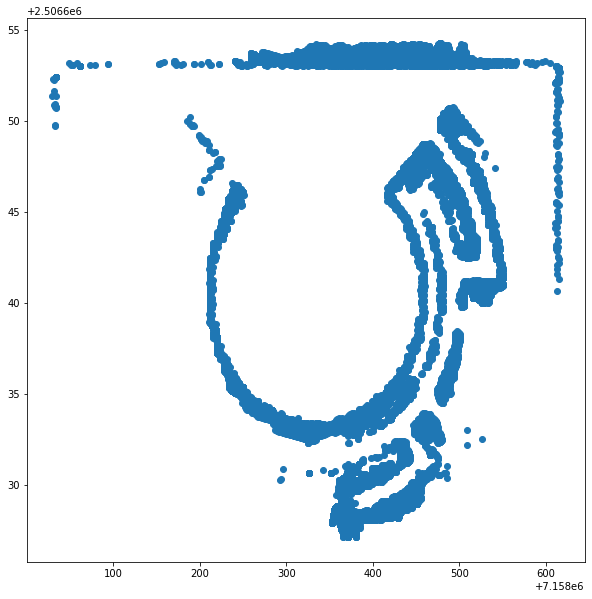

In [956]:
with open('build-remote_control-Desktop_Qt_5_12_5_GCC_64bit-Debug/dmp.txt', 'rb') as f:
    packets = f.readline().split()

R_EARTH = 6378137
xs = []
ys = []
clat = 0
clon = 0
nlat = 0
nlon = 0
cx = 0
cy = 0
cdist = 0
cang = 0
cmark = ''

for p in packets[:-10]:
    pp = parse2(p)
    if pp[0] == '0x30a':
        cy = struct.unpack('>d', pp[2])[0] * 500000. / 11.
    if pp[0] == '0x30b':
        cx = struct.unpack('>d', pp[2])[0] * 10000000. / 53.
    if pp[0] == '0x30e':
        cang = struct.unpack('>d', pp[2])[0]
    if pp[0] == '0x30f':
        cdist = struct.unpack('>d', pp[2])[0]
    if pp[0] == '0x123':
        cmark = pp[2]
        #print(cmark)
        xs.append(cx + cdist * np.sin(cang))
        ys.append(cy + cdist * np.cos(cang))

print(cx, cy)
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.scatter(xs, ys)

In [897]:
np.min(xs), np.max(xs), np.min(ys), np.max(ys)

(7158030.323812632, 7158615.714648842, 2506618.623601086, 2506654.2448332654)

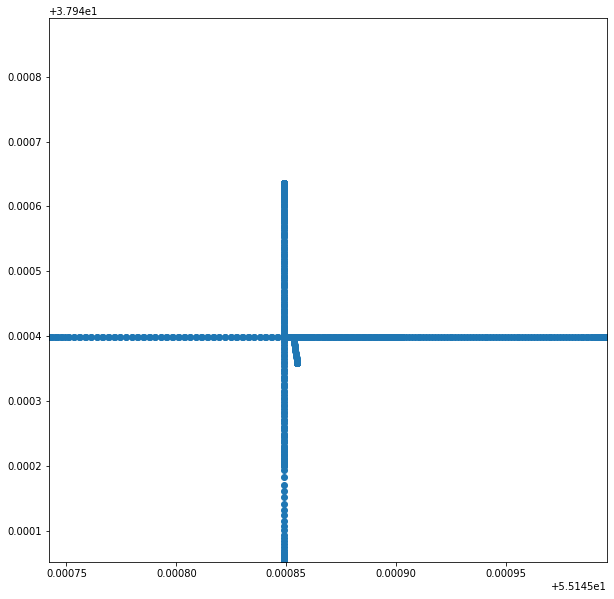

In [656]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.set_xlim(np.min(lats), np.max(lats))
ax.set_ylim(np.min(lons), np.max(lons) + (np.max(lats) - np.min(lats)))
ax.scatter(lats, lons)